In [1]:
import matplotlib.pyplot as plt
from classifier import (
    loadData, 
    predictSex,
    evalAccuracy
)
from pathlib import Path

dataset_path = Path("../data/preprocessed_dataset.csv")
gender_table_path = Path("../data/gender_table.csv")

In [2]:
df = loadData(dataset_path)
gender_table = loadData(gender_table_path)
df = predictSex(df, gender_table)
accuracy, error_dict = evalAccuracy(df)
print(f"Final accuracy={accuracy*100:.2f}%")

Final accuracy=94.61%


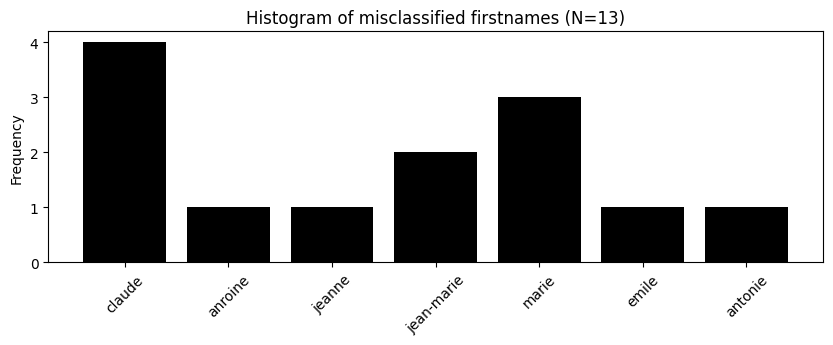

In [3]:
def makeErrorHistogram(error_dict: dict):
    n_error = sum(error_dict.values())
    fig = plt.figure(figsize=(10,3))
    plt.bar(error_dict.keys(), error_dict.values(), color='k')
    plt.title(f'Histogram of misclassified firstnames (N={n_error})')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    return fig

fig = makeErrorHistogram(error_dict)
fig.show()

